In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import figure
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [10]:
def plotdf(f, xran=[-5, 5], yran=[-5, 5], grid=[21, 21], color='k', norm = False):
    x = np.linspace(xran[0], xran[1], grid[0])
    y = np.linspace(yran[0], yran[1], grid[1])
    
    def dX_dt(X, Y, t=0): return map(eval, f)
    
    X , Y  = np.meshgrid(x, y)  
    DX, DY = dX_dt(X, Y)        
    if norm == True:
        M = (np.hypot(DX, DY)) #Normaliza os vetores     
        M[ M == 0] = 1.              
        DX = DX/M                   
        DY = DY/M  
    else: None
    plt.quiver(X, Y, DX, DY, pivot='mid', color=color)
    plt.xlim(xran), plt.ylim(yran)
    plt.grid('on')

### $\textbf{Malthusian}$

In [11]:
def malth(N_0 = 0.1, r = 1, dt = 0.1, N_t = 10, color = 'red'):
    t = np.linspace(-1,(N_t+1)*dt, N_t + 2)
    N = np.zeros(N_t+2)
    N[0] = N_0
    for i in range(N_t+1):
        N[i+1] = N[i] + r*dt*N[i]
    plt.plot(t,N, color = color)

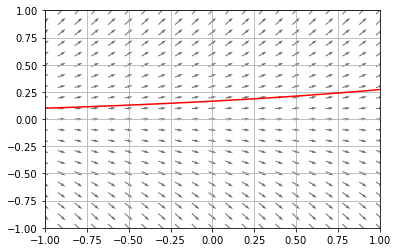

In [17]:
Malth = ["1", "Y"]
plt.figure()
plotdf(Malth, xran=[-1, 1], yran=[-1, 1], color = 'dimgrey')
malth(N_0 = 0.1)
#interact(malth, N_0=widgets.IntSlider(min=-1, max=1, step=0.01, value=10));
plt.show()

### $\textbf{Logistic}$

In [1]:
def logistic(N_0 = 0.1, r = 1, dt = 0.1, N_t = 1000, color = 'red'):
    t = np.linspace(-4,(N_t+1)*dt, N_t + 2)
    N = np.zeros(N_t+2)
    N[0] = N_0
    for i in range(N_t+1):
        N[i+1] = r*N[i]*(1.-N[i])
    plt.plot(t,N, color = color)

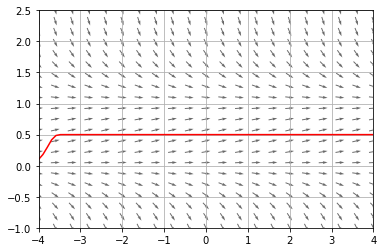

In [19]:
Logistic = ["1","Y*(1-(Y))"]
plt.figure()
plotdf(Logistic, xran=[-4, 4], yran=[-1, 2.5],color = 'dimgrey' ,norm = True)
logistic(r = 2)
plt.show()

### $\textbf{Lotka-Volterra}$

In [2]:
def lotka(a = 1, b = 1, c = 1, d = 1, dt = 0.001, N_t = 100000, color = 'red'):
    t = np.arange(0,N_t+dt,dt)
    x = np.zeros(N_t+1)
    y = np.zeros(N_t+1)
    #N[0] = N_0
    t[0] = 0
    x[0] = 2
    y[0] = 2
    for n in range(1,N_t+1):
        x[n] = x[n-1]+ dt*(a*x[n-1]-b*x[n-1]*y[n-1])
        y[n] = y[n-1]+ dt*(c*x[n-1]*y[n-1]-d*y[n-1])
    plt.plot(x,y, color = color)

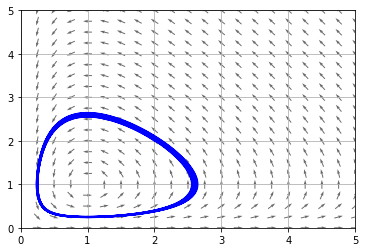

In [43]:
Lotka = ["X - X*Y", "X*Y - Y"]
plt.figure()
plotdf(Lotka, xran=[0, 5], yran=[0, 5],color = 'dimgrey' ,norm = True)
lotka(color = 'b')
#plt.xlim(0.2,5)
#plt.ylim(0,5)
plt.show()